- Handwritten digit dataset with 28x28 pixels images.

- ANN to predict the digit in the image.

- This is an Multi-class classification problem.

- Since it is multi class, we'll have 10 output neurons (0 to 9 digits).

- We'll use softmax activation function in the output layer.

- Highest probability neuron will be the predicted digit.

- We'll have following:

        - 784 input neurons (28x28 pixels)

        - 1 hidden layer with 128 neurons

        - 10 output neurons

- Weights and biases in each layer:

        - Input to Hidden layer: 784x128 weights and 128 biases

        - Hidden to Output layer: 128x10 weights and 10 biases

These weights and biases may increase or decrease if we add or subtract neurons in the layers.

In [49]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [50]:
(xTrain, yTrain), (xTest, yTest) = keras.datasets.mnist.load_data()

In [51]:
xTrain.shape

(60000, 28, 28)

In [52]:
xTrain[0]               # 1st image with pixel value

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [53]:
xTest.shape

(10000, 28, 28)

In [54]:
yTrain              # label for images of xTest

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

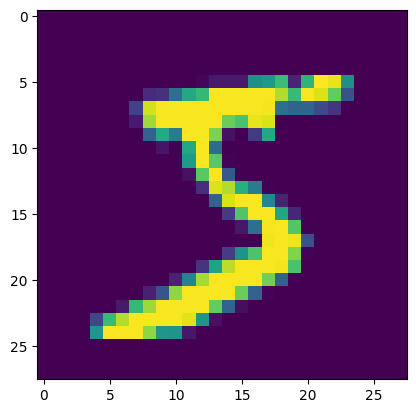

In [55]:
import matplotlib.pyplot as plt              # To view images

plt.imshow(xTrain[0])

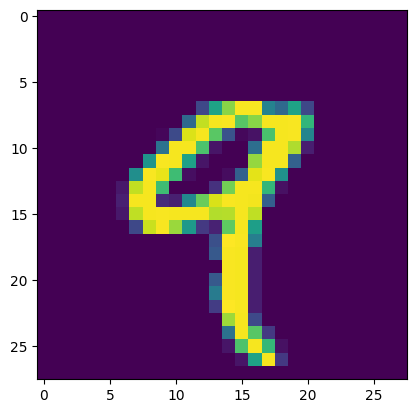

In [56]:
plt.imshow(xTrain[4])

### Changing the values in a similar range i.e. between 0 and 1

In [57]:
xTrain = xTrain/255
xTest = xTest/255

In [58]:
xTrain[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [59]:
model = Sequential()

# First we have to flatten the data (Converting 2d to 1d) because right now we have data in 28x28 format but we'll have 784 input neurons
# For conversion into 1d, we'll use flatten()

model.add(Flatten(input_shape = (28, 28)))          # Input Layer ; Output will be given to dense, hense we don't have to specify input layers
model.add(Dense(128, activation='relu'))            # Hidden Layer ; Activation is called identity function
model.add(Dense(10, activation='softmax'))            # Output layer ; We have 10 classes, hence 10 neurons in output layer ; Activation is called softmax function because of multi class classification

d:\Programming lang\PYTHON\Deep Learning Notebooks\.venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [60]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

- 784 inputs going into 128 neurons with 128 biases, we'll have 784x128 + 128 = 100480 parameters and so on for next layer.

In [61]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer='Adam')

In [62]:
model.fit(xTrain, yTrain, epochs=10, validation_split=.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.4756 - val_loss: 0.1488
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.1308 - val_loss: 0.1170
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0897 - val_loss: 0.1004
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0654 - val_loss: 0.0925
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0479 - val_loss: 0.0886
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0379 - val_loss: 0.0842
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0282 - val_loss: 0.1030
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0235 - val_loss: 0.1026
Epoch 9/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0188 - val_loss: 0.0968
Epoch 10/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0160 - val_loss: 0.0904


In [63]:
model.get_weights()

[array([[-0.05921492,  0.03807762, -0.01689984, ..., -0.00342359,
         -0.03029451, -0.03294778],
        [ 0.06377593, -0.06886718,  0.0448522 , ...,  0.06758643,
          0.03730085,  0.06147812],
        [ 0.02772383, -0.00710043, -0.01609592, ..., -0.05736314,
         -0.04082354, -0.00372475],
        ...,
        [ 0.07093116, -0.00601516,  0.04453585, ..., -0.03982363,
          0.02523259,  0.01261222],
        [ 0.064339  ,  0.01444996, -0.03716603, ...,  0.01035471,
          0.00796073, -0.01788358],
        [-0.00198182,  0.07020099,  0.05016387, ..., -0.02753451,
          0.03686667,  0.00986508]], dtype=float32),
 array([ 9.56395566e-02, -6.55046627e-02,  5.78654883e-03,  1.09251730e-01,
         1.50790557e-01, -1.43063605e-01,  1.02754198e-01, -1.19125776e-01,
         1.00493699e-01,  1.44174872e-02,  5.84751368e-03,  1.78836808e-01,
        -1.52391508e-01,  6.77229092e-02,  4.91082631e-02,  5.17989472e-02,
         3.57514024e-02, -4.76945154e-02, -1.27686076e

In [64]:
yProbability = model.predict(xTest)
yProbability            # Gives the probability of each number

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[1.76636050e-09, 5.76593079e-11, 1.10970234e-07, ...,
        9.99286830e-01, 2.66569060e-07, 1.68883980e-06],
       [6.51653731e-11, 1.37278766e-05, 9.99985814e-01, ...,
        1.87276193e-18, 6.85899408e-08, 4.50270551e-14],
       [3.25168656e-07, 9.99646187e-01, 2.33425963e-05, ...,
        1.67832681e-04, 1.56557260e-04, 9.27990357e-07],
       ...,
       [1.81272049e-17, 1.20267921e-14, 3.67285311e-14, ...,
        2.09202042e-08, 2.58747329e-11, 2.57230148e-08],
       [2.08016926e-14, 2.67405862e-14, 2.79808176e-16, ...,
        1.40518372e-15, 6.88471236e-09, 1.80086722e-15],
       [7.90603607e-12, 2.78436501e-14, 2.63798228e-12, ...,
        2.06226413e-15, 7.95720369e-15, 5.09440224e-17]], dtype=float32)

In [65]:
ypred = yProbability.argmax(axis=1)               # Selecting the number with max prob

In [66]:
ypred

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [67]:
from sklearn.metrics import accuracy_score

accuracy_score(yTest, ypred)

0.9767

- We can improve the accuracy with change in architecture

In [68]:
model2 = Sequential()

model2.add(Flatten(input_shape = (28, 28)))          
model2.add(Dense(128, activation='relu'))            
model2.add(Dense(32, activation='relu'))            
model2.add(Dense(10, activation='softmax'))          

d:\Programming lang\PYTHON\Deep Learning Notebooks\.venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [69]:
model2.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 104,938 (409.91 KB)

 Trainable params: 104,938 (409.91 KB)

 Non-trainable params: 0 (0.00 B)

In [71]:
from tensorflow.keras.utils import to_categorical

yTrain = to_categorical(yTrain)

model2.compile(loss = 'categorical_crossentropy', optimizer='Adam')

history = model2.fit(xTrain, yTrain, epochs=25, validation_split=.2)

Epoch 1/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0743 - val_loss: 0.1022
Epoch 2/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0552 - val_loss: 0.1049
Epoch 3/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0437 - val_loss: 0.0962
Epoch 4/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0337 - val_loss: 0.0991
Epoch 5/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0257 - val_loss: 0.1034
Epoch 6/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0216 - val_loss: 0.1026
Epoch 7/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0183 - val_loss: 0.1104
Epoch 8/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0169 - val_loss: 0.1157
Epoch 9/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0145 - val_loss: 0.1259
Epoch 10/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0127 - val_loss: 0.1164
Epoch 11/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0121 - val_loss: 0.1204
Epoch 12/25
1500/1500 ━━━━━━━━

In [72]:
# model2.compile(loss = 'sparse_categorical_crossentropy', optimizer='Adam')
# history = model2.fit(xTrain, yTrain, epochs=25, validation_split=.2)

In [73]:
yProbability2 = model2.predict(xTest)
yProbability2           

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 957us/step


array([[6.48217916e-13, 5.07190877e-15, 2.84339374e-09, ...,
        9.99995112e-01, 2.86928648e-10, 4.26451516e-06],
       [3.69401736e-20, 2.49927257e-09, 1.00000000e+00, ...,
        1.20638706e-22, 8.19699279e-15, 1.41630270e-29],
       [1.02213195e-11, 9.99999762e-01, 1.06998655e-11, ...,
        3.51643187e-10, 2.22419828e-07, 2.57037950e-15],
       ...,
       [2.61360138e-20, 9.32586832e-15, 4.22978858e-19, ...,
        7.58444783e-12, 7.97636900e-14, 4.70303907e-10],
       [3.62146094e-21, 4.95996559e-22, 2.00335052e-29, ...,
        4.45204166e-22, 2.71032861e-16, 3.36792454e-26],
       [1.49748162e-17, 7.02192265e-20, 4.11366117e-17, ...,
        1.45850418e-37, 1.91184704e-18, 2.81769087e-18]], dtype=float32)

In [74]:
ypred2 = yProbability2.argmax(axis=1)               # Selecting the number with max prob

In [75]:
accuracy_score(yTest, ypred2)

0.9776

In [76]:
history.history

{'loss': [0.07489750534296036,
  0.055734649300575256,
  0.04436955600976944,
  0.03469516709446907,
  0.03043871372938156,
  0.02441154420375824,
  0.02057419903576374,
  0.020150091499090195,
  0.015831025317311287,
  0.015808338299393654,
  0.013709085993468761,
  0.012495740316808224,
  0.011448665522038937,
  0.008359464816749096,
  0.011740162968635559,
  0.008122986182570457,
  0.009850429370999336,
  0.010505336336791515,
  0.008553927764296532,
  0.008191882632672787,
  0.008357138372957706,
  0.00799522828310728,
  0.00770422862842679,
  0.004913963843137026,
  0.010479103773832321],
 'val_loss': [0.10216660797595978,
  0.10488706827163696,
  0.09616024047136307,
  0.09910497069358826,
  0.10342284291982651,
  0.10262225568294525,
  0.1103963702917099,
  0.1157355010509491,
  0.1259424090385437,
  0.11638986319303513,
  0.12038947641849518,
  0.13493259251117706,
  0.1353480964899063,
  0.13579626381397247,
  0.13545161485671997,
  0.13803566992282867,
  0.16247311234474182,


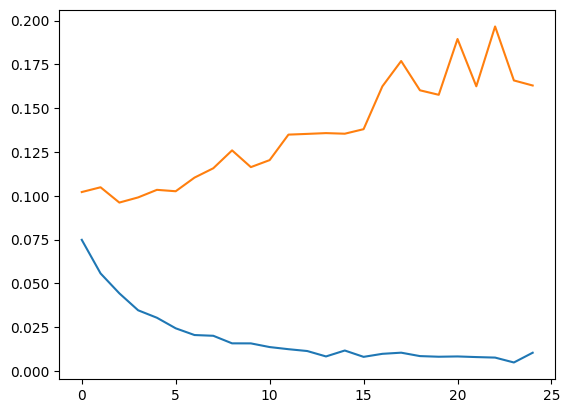

In [77]:
import matplotlib.pyplot as plt 

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [78]:
xTest[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

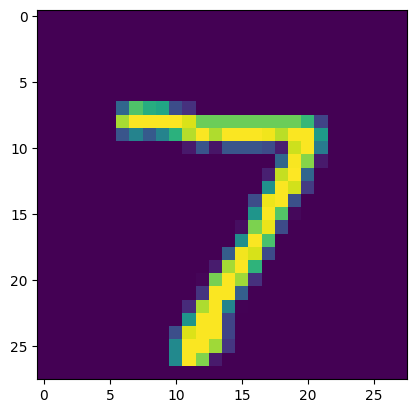

In [79]:
plt.imshow(xTest[0])

In [80]:
model.predict(xTest[0].reshape(1,28,28)).argmax(axis = 1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


array([7], dtype=int64)

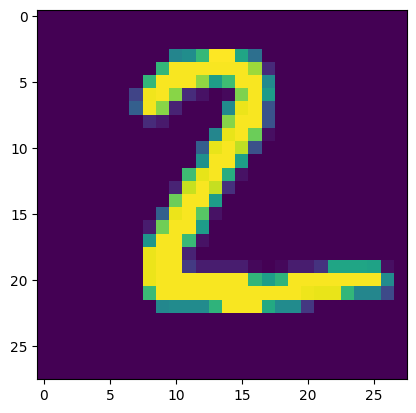

In [81]:
plt.imshow(xTest[1])

In [82]:
model.predict(xTest[1].reshape(1,28,28)).argmax(axis = 1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


array([2], dtype=int64)